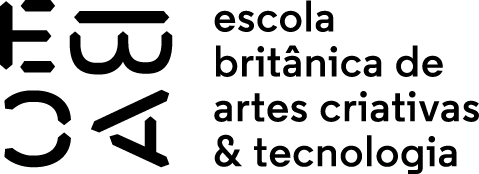


### Profissão: Cientista de Dados

- Projeto 02 | Previsão de renda
- Aluno: Heber Davi Rossi Filho
- Data: 20 de fev de 2024.

# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Utilizaremos para nosso trabalho o banco de dados 'previsao_de_renda.csv' que contém informações de vários indivíduos. Com base nessas informações, vamos buscar encontrar um modelo que consiga prever a renda do indivíduo com base nas suas próprias informações.


## Etapa 2 Crisp-DM: Entendimento dos dados

*  Abaixo encontra-se uma tabela com todas as informações que cada indivíduo possui.

### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de Referência do Registro                                      | object|
| id_cliente              |  Identificador do Cliente                                       | int|
| sexo                    |  Sexo do Cliente ("M" = Masculino ; "F" = Feminino)                                     | object|
| posse_de_veiculo        |  Indica se o cliente possui veículo (True = 'Possui veículo'; False = 'Não possui veículo')                                      | bool |
| posse_de_imovel         |  Indica se o cliente possui imóvel (True = 'Possui imóvel'; False = 'Não possui imóvel')                                      | bool |
| qtd_filhos              |  Quantidade de filhos do cliente                                      | int |
| tipo_renda              |  Tipo de renda do cliente                                     | object |
| educacao                |  Grau de educação do cliente                                      | object |
| estado_civil            |  Estado civil do cliente                                    | object |
| tipo_residencia         |  Tipo de residência do cliente                                      | object |
| idade                   |  Idade do cliente em anos                                  | int |
| tempo_emprego           |  Tempo no emprego atual                                      | float |
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência                                     | float |
| renda                   |  Renda do cliente em reais                                     | float |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
# !pip install ydata-profiling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [3]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [4]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [5]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [6]:
# retirando colunas desnecessárias para análise

renda.drop(columns=['Unnamed: 0', 'id_cliente'], inplace=True)

#retirando linhas duplicadas
renda.drop_duplicates(inplace=True, ignore_index=True)

renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14593 entries, 0 to 14592
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               14593 non-null  object 
 1   sexo                   14593 non-null  object 
 2   posse_de_veiculo       14593 non-null  bool   
 3   posse_de_imovel        14593 non-null  bool   
 4   qtd_filhos             14593 non-null  int64  
 5   tipo_renda             14593 non-null  object 
 6   educacao               14593 non-null  object 
 7   estado_civil           14593 non-null  object 
 8   tipo_residencia        14593 non-null  object 
 9   idade                  14593 non-null  int64  
 10  tempo_emprego          12090 non-null  float64
 11  qt_pessoas_residencia  14593 non-null  float64
 12  renda                  14593 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.3+ MB


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis.

In [7]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
prof.to_file('./output/renda_analisys.html')

C:\ProgramData\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




### Variáveis Quantitativas

In [9]:
renda_quant = renda[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]
renda_quant

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,26,6.602740,1.0,8060.34
1,0,28,7.183562,2.0,1852.15
2,0,35,0.838356,2.0,2253.89
3,1,30,4.846575,3.0,6600.77
4,0,33,4.293151,1.0,6475.97
...,...,...,...,...,...
14588,0,48,13.887671,1.0,7990.58
14589,0,57,NaN,1.0,10093.45
14590,0,45,7.832877,2.0,604.82
14591,0,36,4.298630,2.0,3352.27


In [10]:
renda_quant.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.360361,-0.063588,0.889449,0.030296
idade,-0.360361,1.000000,0.321970,-0.339365,0.023445
tempo_emprego,-0.063588,0.321970,1.000000,-0.067115,0.385014
qt_pessoas_residencia,0.889449,-0.339365,-0.067115,1.000000,0.048616
renda,0.030296,0.023445,0.385014,0.048616,1.000000


A partir da matriz de correlação, observamos que a variável de maior relação com a varíavel renda é tempo_emprego, com uma
correlação de 38,5%.

#### Matriz de dispersão 

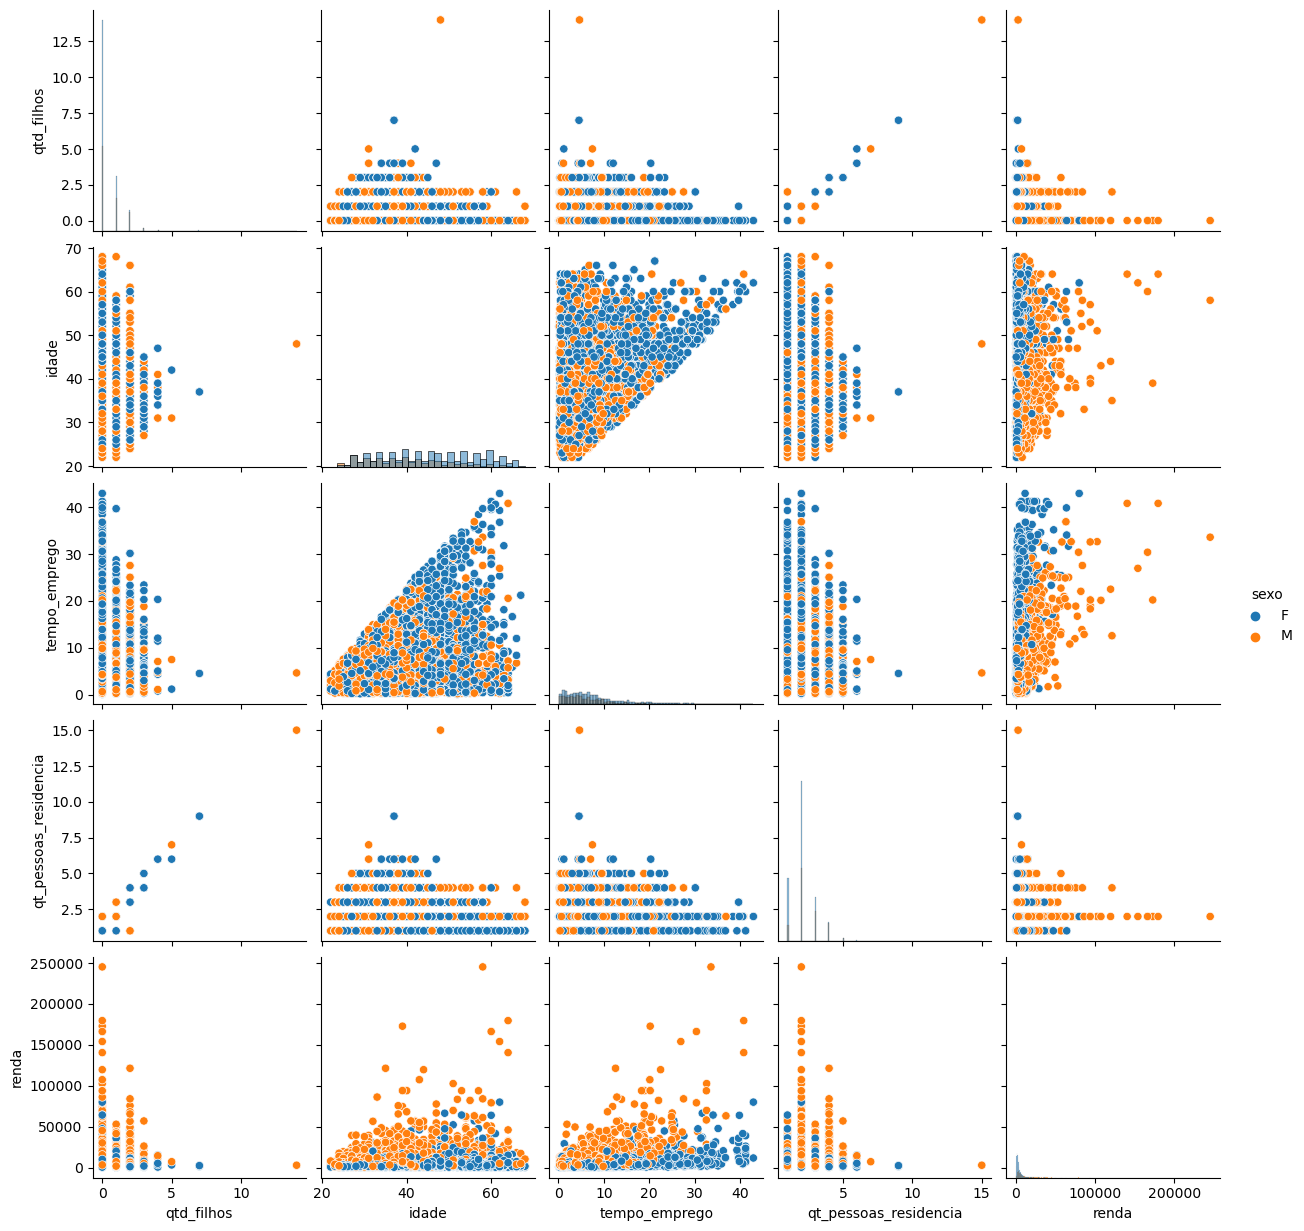

In [11]:
sns.pairplot(data=renda, 
             hue='sexo', 
             vars=['qtd_filhos', 
                   'idade', 
                   'tempo_emprego', 
                   'qt_pessoas_residencia', 
                   'renda'], 
             diag_kind='hist',
            )


Analisando pela matriz de dispersão, observamos baixa correlação entre as variáveis quantitativas e alguns outliers na variável renda, mesmo que em pequena quantidade, principalmente em relação ao "tempo_emprego" que obteve maior correlação.

#### Clustermap

[None, None, None, None, None, None, None, None, None, None]

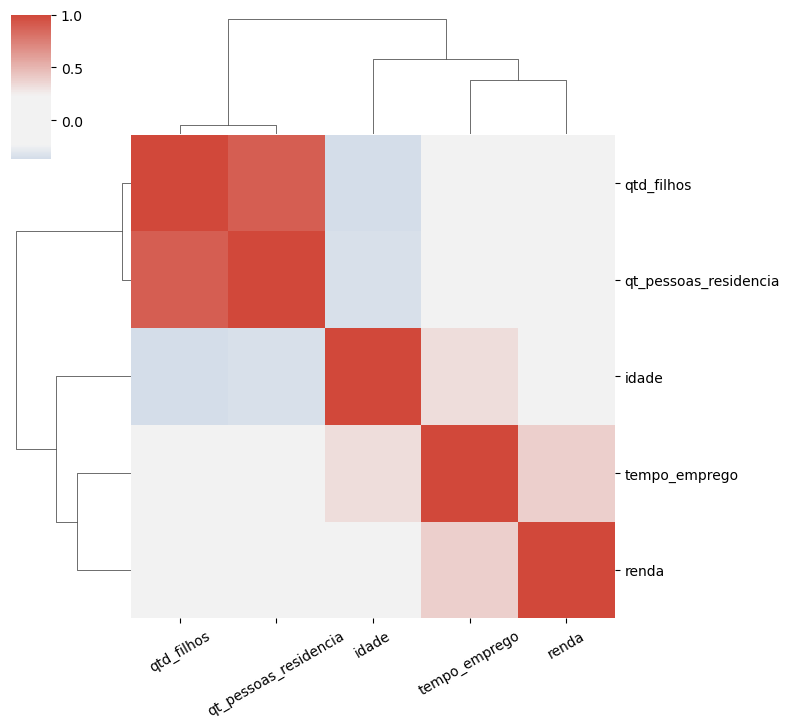

In [12]:
cmap = sns.diverging_palette(h_neg=250, 
                             h_pos=375, 
                             as_cmap=True, 
                             sep=60, 
                             center = 'light')

fig = sns.clustermap(data=renda_quant.corr(), 
                    figsize=(8, 8), 
                    center=0, 
                    cmap=cmap)
plt.setp(fig.ax_heatmap.get_xticklabels(), rotation=30)


Com o clustermap, novamente percebemos os resultados de baixa correlação com a variável renda, com exceção da variável "tempo_emprego".

<Axes: xlabel='tempo_emprego', ylabel='renda'>

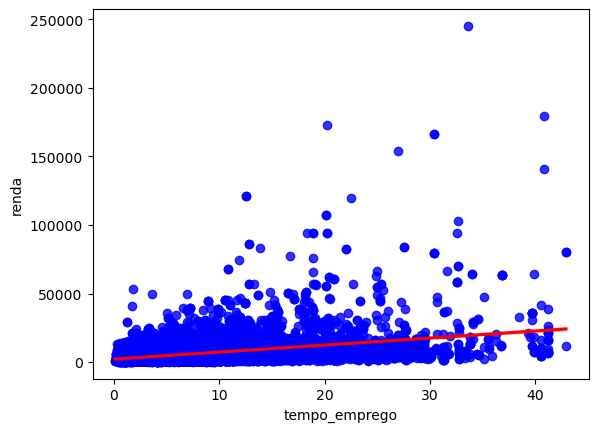

In [13]:
# Linha de tendência:
sns.regplot(x='tempo_emprego', 
            y='renda', 
            data=renda,
            scatter_kws={'color': 'blue'}, 
            line_kws={'color': 'red'}, 
            )

### Variáveis Qualitativas

<Axes: xlabel='posse_de_veiculo', ylabel='renda'>

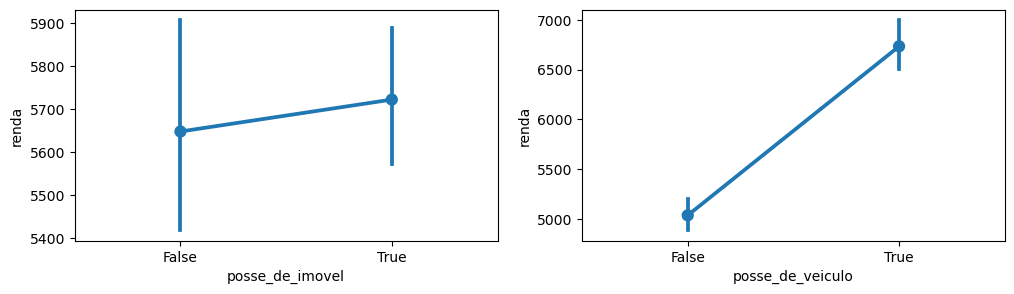

In [14]:
plt.rc('figure', figsize=(12,3))
fig, axes = plt.subplots(1, 2)

sns.pointplot(ax=axes[0],
              x='posse_de_imovel', 
              y='renda',  
              data=renda, 
              dodge=True,
             )

sns.pointplot(ax=axes[1],
              x='posse_de_veiculo', 
              y='renda', 
              data=renda, 
              dodge=True, 
              )


<Axes: xlabel='sexo', ylabel='renda'>

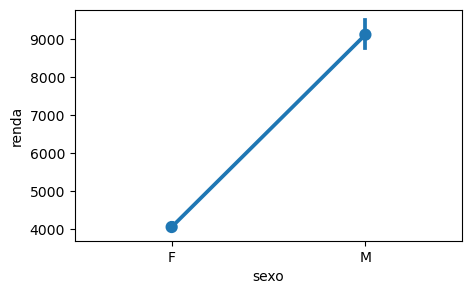

In [15]:
plt.rc('figure', figsize=(5,3))

sns.pointplot(x='sexo', 
              y='renda',  
              data=renda, 
              dodge=True,
              )

Analisando as variáveis qualitativas booleanas, notamos que as variáveis reelevantes para predição de renda seria o "sexo" e "posse_de_veículo", com maior distância entre os valores.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



Nos códigos abaixo, estamos retirando colunas que não serão necessárias e os dados faltantes.

In [16]:
renda.drop(columns='data_ref', inplace=True)
renda.dropna(inplace=True)

renda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12090 entries, 0 to 14592
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   12090 non-null  object 
 1   posse_de_veiculo       12090 non-null  bool   
 2   posse_de_imovel        12090 non-null  bool   
 3   qtd_filhos             12090 non-null  int64  
 4   tipo_renda             12090 non-null  object 
 5   educacao               12090 non-null  object 
 6   estado_civil           12090 non-null  object 
 7   tipo_residencia        12090 non-null  object 
 8   idade                  12090 non-null  int64  
 9   tempo_emprego          12090 non-null  float64
 10  qt_pessoas_residencia  12090 non-null  float64
 11  renda                  12090 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.0+ MB


In [17]:
#transformando as variáveis em dummies

renda_dummies = pd.get_dummies(data=renda)
renda_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12090 entries, 0 to 14592
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12090 non-null  bool   
 1   posse_de_imovel                12090 non-null  bool   
 2   qtd_filhos                     12090 non-null  int64  
 3   idade                          12090 non-null  int64  
 4   tempo_emprego                  12090 non-null  float64
 5   qt_pessoas_residencia          12090 non-null  float64
 6   renda                          12090 non-null  float64
 7   sexo_F                         12090 non-null  uint8  
 8   sexo_M                         12090 non-null  uint8  
 9   tipo_renda_Assalariado         12090 non-null  uint8  
 10  tipo_renda_Bolsista            12090 non-null  uint8  
 11  tipo_renda_Empresário          12090 non-null  uint8  
 12  tipo_renda_Pensionista         12090 non-null 

In [18]:
#correlação entre as variáveis dummeis com a variável renda

renda_dummies.corr()['renda'].sort_values(ascending=False)

renda                            1.000000
tempo_emprego                    0.385014
sexo_M                           0.265174
idade                            0.127516
posse_de_veiculo                 0.082040
estado_civil_Casado              0.054290
tipo_renda_Servidor público      0.042177
tipo_residencia_Estúdio          0.026417
qt_pessoas_residencia            0.019571
educacao_Superior completo       0.017425
posse_de_imovel                  0.015187
tipo_residencia_Casa             0.014234
tipo_residencia_Governamental    0.005464
qtd_filhos                       0.003422
tipo_residencia_Aluguel         -0.000885
educacao_Secundário             -0.001102
tipo_renda_Bolsista             -0.003635
tipo_renda_Pensionista          -0.009199
estado_civil_Separado           -0.009983
educacao_Primário               -0.010567
tipo_renda_Assalariado          -0.011170
educacao_Pós graduação          -0.011202
tipo_residencia_Comunitário     -0.012563
tipo_renda_Empresário           -0

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Vamos utilizar a técnica "DecisionTreeRegressor". O DecisionTreeRegressor é usado quando queremos prever uma variável de saída numérica (contínua), em oposição à variável de saída categórica que seria tratada por uma árvore de classificação. Árvores de decisão são fáceis de interpretar e permitem a identificação dos atributos mais relevantes para a previsão da variável-alvo, tornando-a uma boa escolha para o projeto.

### Rodando o modelo


In [19]:
X = renda_dummies.drop(columns='renda')
y = renda_dummies['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Agora vamos procurar identificar os hiperparâmetros que deixará melhor a nossa árvore. E como resultado, profundidade 8 com 4 folhas tem o maior valor obtido de 0.41

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,0.191352,0.191352,0.191352,0.191352,0.191352,0.191352,0.191352,0.191352
3,0.330359,0.330359,0.330359,0.330359,0.330359,0.330359,0.330359,0.330359
4,0.327341,0.346052,0.346052,0.346070,0.346070,0.349327,0.335888,0.335888
5,0.333739,0.352615,0.370957,0.370956,0.351494,0.356502,0.344627,0.343622
6,0.329129,0.355149,0.369221,0.369432,0.364607,0.372432,0.355821,0.356251
7,0.347642,0.378985,0.394332,0.387062,0.387736,0.385948,0.367175,0.364493
8,0.374753,0.388909,0.414482,0.392635,0.394710,0.392093,0.383725,0.380885


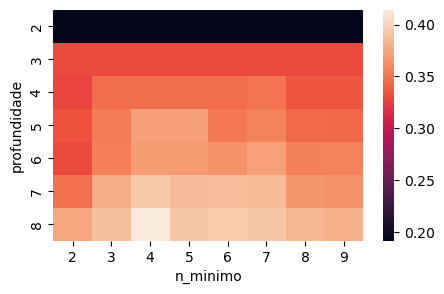

In [20]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 9):
    for j in range(2, 10):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train, y_train)
        mse1 = regr_1.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

In [21]:
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=4)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=42)

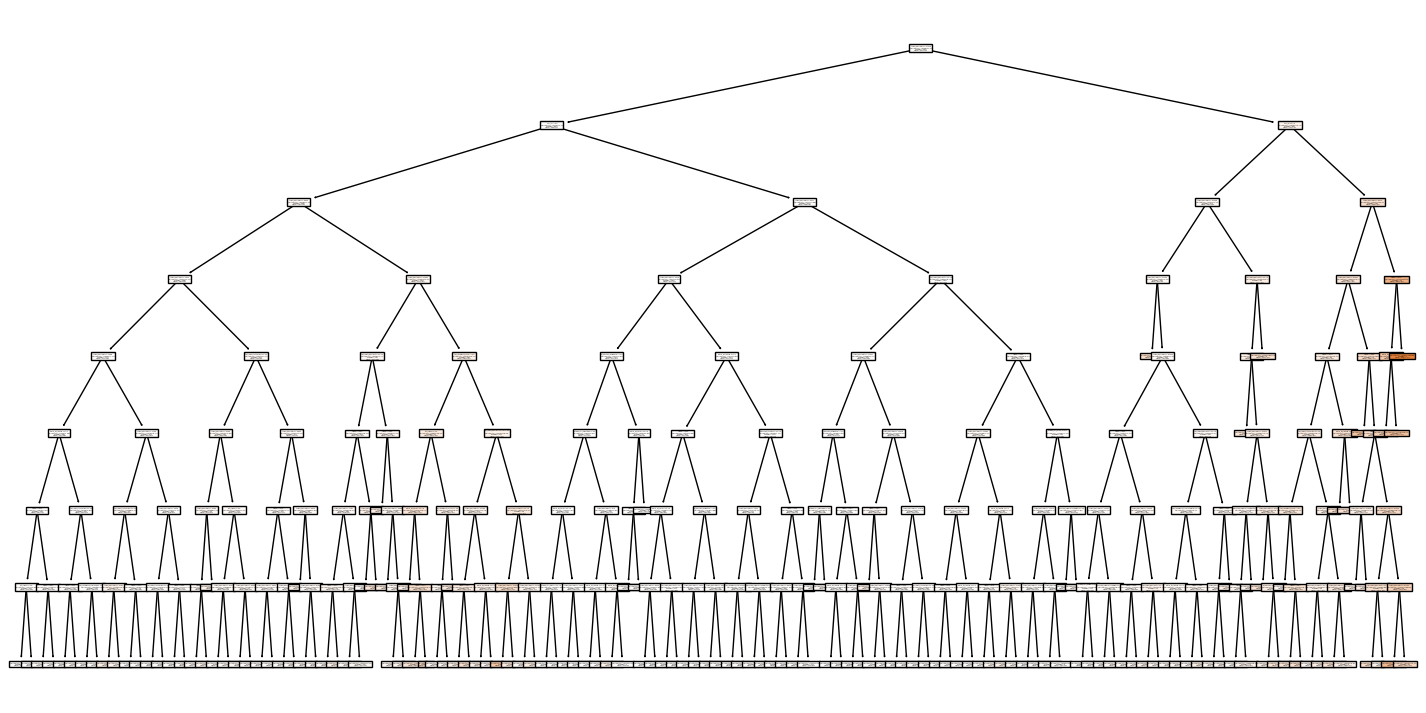

In [24]:
# Converter os nomes das colunas em uma lista
feature_names = X.columns.tolist()

# Plotar a árvore de decisão
plt.rc('figure', figsize=(18, 9))
tp = tree.plot_tree(decision_tree=reg_tree,
                    feature_names=feature_names,
                    filled=True)
plt.show()

Visualização impressa da árvore

In [26]:
text_tree_print = tree.export_text(decision_tree=reg_tree)

print(text_tree_print)

|--- feature_4 <= 17.08
|   |--- feature_6 <= 0.50
|   |   |--- feature_4 <= 6.93
|   |   |   |--- feature_4 <= 4.54
|   |   |   |   |--- feature_4 <= 1.69
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_3 <= 52.50
|   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |--- value: [3237.54]
|   |   |   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |   |   |--- value: [1415.27]
|   |   |   |   |   |   |--- feature_3 >  52.50
|   |   |   |   |   |   |   |--- feature_3 <= 56.00
|   |   |   |   |   |   |   |   |--- value: [6817.46]
|   |   |   |   |   |   |   |--- feature_3 >  56.00
|   |   |   |   |   |   |   |   |--- value: [4458.54]
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |--- feature_3 <= 54.50
|   |   |   |   |   |   |   |   |--- value: [4821.44]
|   |   |   |   |   |   |   |--- feature_3 >  54.50
|   |   |   |   |   |   |   |   |--

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [25]:
r2_train = reg_tree.score(X=X_train, y=y_train)
r2_test = reg_tree.score(X=X_test, y=y_test)

template = 'O coeficiente de determinação (𝑅2) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(reg_tree.get_depth(), 'treino', r2_train).replace(".", ","))
print(template.format(reg_tree.get_depth(), 'teste', r2_test).replace(".", ","), '\n')

O coeficiente de determinação (𝑅2) da árvore com profundidade = 8 para a base de treino é: 0,60
O coeficiente de determinação (𝑅2) da árvore com profundidade = 8 para a base de teste é: 0,42 



## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [27]:
entrada = pd.DataFrame([{'sexo': 'F',
                         'posse_de_veiculo': False,
                         'posse_de_imovel': False,
                         'qtd_filhos': 2,
                         'tipo_renda': 'Assalariado',
                         'educacao': 'Superior completo',
                         'estado_civil': 'Solteiro',
                         'tipo_residencia': 'Casa',
                         'idade': 30,
                         'tempo_emprego': None,
                         'qt_pessoas_residencia': 1}])
entrada = pd.concat([X, pd.get_dummies(entrada)]).fillna(value=0).tail(1)
print(f"Renda estimada: R${str(np.round(reg_tree.predict(entrada).item(), 2)).replace('.', ',')}")

Renda estimada: R$2985,6
